# ***Arboles de decision - Decision Tree***

**Ejercicio Distribucion de Peso y Altura en hombres-mujeres**

Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 11

In [49]:
from google.colab import files
uploaded = files.upload()

Saving datos_h_m.csv to datos_h_m (1).csv


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split



In [51]:
dataset_ = pd.read_csv("datos_h_m.csv")

In [52]:
dataset_.head()

,peso_kg,altura_m,clase
0,70.701,1.6236,mujer
1,81.071,1.5296,mujer
2,48.329,1.5902,mujer
3,73.297,1.6996,mujer
4,68.950,1.5920,mujer


In [53]:
dataset_.shape

(1800, 3)

In [54]:
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   peso_kg   1800 non-null   float64
 1   altura_m  1800 non-null   float64
 2   clase     1800 non-null   object 
dtypes: float64(2), object(1)
memory usage: 42.3+ KB


In [55]:
dataset_.describe()

,peso_kg,altura_m
count,1800.000000,1800.000000
mean,71.020681,1.649186
std,9.861053,0.118239
min,40.544000,1.323600
25%,64.186000,1.565575
50%,70.662000,1.647800
75%,77.742000,1.730875
max,106.900000,2.036600


In [56]:
dataset_["clase"].value_counts().to_frame()

,count
clase,
mujer,900
hombre,900


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)


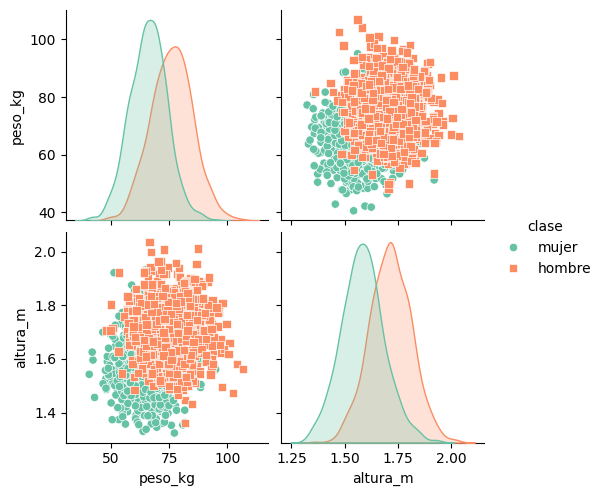

In [57]:
sns.pairplot(dataset_, hue="clase", markers=["o", "s", "D"], palette="Set2")

In [58]:
X = dataset_.values[:, 0:2]
y = dataset_.values[:,2]

In [59]:
print(X)

[[70.701 1.6236]
 [81.071 1.5296]
 [48.329 1.5902]
 ...
 [75.894 1.7666]
 [73.006 1.7476]
 [60.211 1.6823]]


In [60]:
X.shape

(1800, 2)

In [61]:
print(y)

['mujer' 'mujer' 'mujer' ... 'hombre' 'hombre' 'hombre']


In [62]:
# Mapeo de las etiquetas 'mujer' a 0 y 'hombre' a 1
y_mapped = np.where(y == 'mujer', 0, 1)

In [63]:
y_mapped.shape

(1800,)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.3, random_state=1, stratify=y)

In [65]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [66]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=2,
                              random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [67]:
y_pred = tree.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [68]:
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
cm_tree_1= confusion_matrix(y_test, y_pred)

print(cm_tree_1)

[[183  87]
 [ 20 250]]


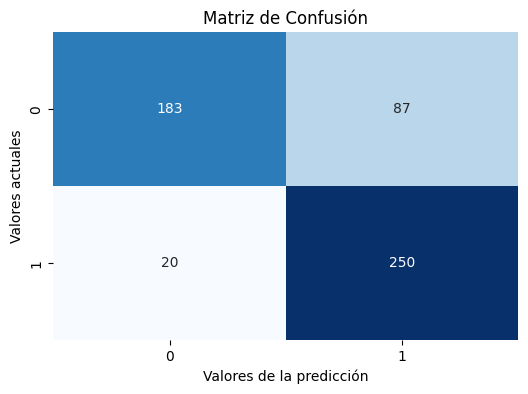

In [69]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
print ("Accuracy / Exactitud es " +str(accuracy_score(y_test,y_pred)*100) + " %")

Accuracy / Exactitud es 80.18518518518518 %


In [72]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


<ipython-input-65-6762539d603b>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


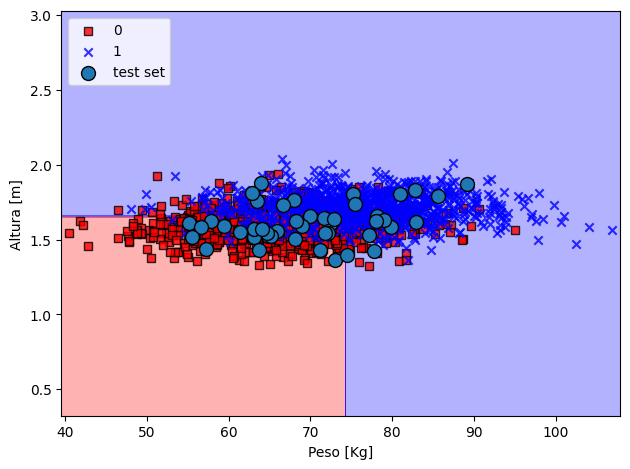

In [73]:

# Utiliza la función plot_decision_regions con tus datos
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('Peso [Kg]')
plt.ylabel('Altura [m]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [74]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [75]:
dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['mujer',
                                        'hombre'],
                           feature_names=['Peso [Kg]',
                                          'Altura[m]'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [47]:
from IPython.display import Image

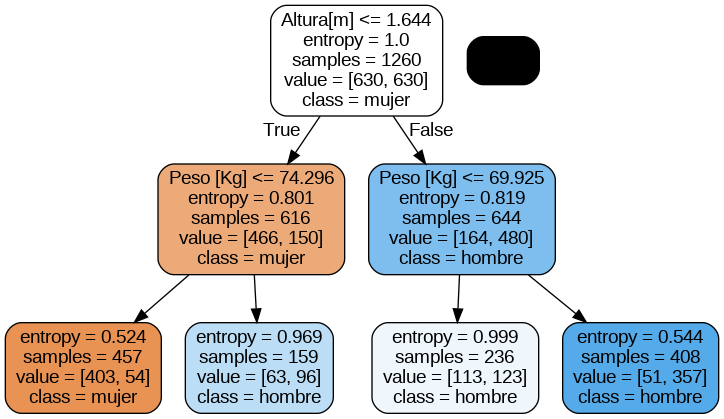

In [76]:
Image(filename='tree.png', width=600)